# Credit Exploratory Data Analysis

This case study is based on the



Our Analysis is divided as the following:
1. Business Understanding
2. Data Understanding
3. Data Cleaning
4. Data Analysis
    1. univariate Analysis
    2. Bivariate Analysis
5. Results and Conclusion

Business Understanding has been covered in depth in the word document attached with this notebook. Let us start with the Data Understanding by taking a close look at the datasets.

## Data Understanding

We have been given three datasets for analysis. A first glance at the datasets we realise that the previous_dataset and the application_dataset can be merged together on the `SK_ID_CURR` column to get a better understanding of all the variables. The column description dataset can be used to figure out which features would be useful for analysis and which ones can be discarded.


Lets start by importing the datasets


In [2]:
#!pip3 install seaborn==0.9.0 in case some of the plots dont work
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

loan = pd.read_csv("application_data.csv")
prev = pd.read_csv("previous_application.csv")
description = pd.read_csv("columns_description.csv")

In [2]:
loan

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cash loans           F            N   
13          100017       0         Cash loans           M            Y   
14          100018       0         Cash loans           F            N   
15          100019       0         Cash loans           M            Y   
16          100020       0         Cash loans           M            N   
17          100021       0    Revolving loans           F            N   
18          100022       0    Revolving loans           F            N   
19          100023       0         Cash loans           F            N   
20          100024       0    Revolving loans           M            Y   
21          100025       0         Cash loans           F            Y   
22          100026       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
24          100029       0         Cash loans           M            Y   
25          100030       0         Cash loans           F            N   
26          100031       1         Cash loans           F            N   
27          100032       0         Cash loans           M            N   
28          100033       0         Cash loans           M            Y   
29          100034       0    Revolving loans           M            N   
30          100035       0         Cash loans           F            N   
31          100036       0         Cash loans           F            N   
32          100037       0         Cash loans           F            N   
33          100039       0         Cash loans           M            Y   
34          100040       0         Cash loans           F            N   
35          100041       0         Cash loans           F            N   
36          100043       0         Cash loans           F            N   
37          100044       0         Cash loans           M            N   
38          100045       0         Cash loans           F            N   
39          100046       0    Revolving loans           M            Y   
40          100047       1         Cash loans           M            N   
41          100048       0         Cash loans           F            N   
42          100049       1         Cash loans           F            N   
43          100050       0         Cash loans           F            N   
44          100051       0         Cash loans           M            N   
45          100052       0    Revolving loans           F            N   
46          100053       0         Cash loans           F            N   
47          100054       0         Cash loans           F            N   
48          100055       0         Cash loans           F            N   
49          100056       0         Cash loans           M            Y   
50          100058       0    Revolving loans           F            N   
51          100059       0         Cash loans           M            Y   
52          100060       0         Cash loans           M            Y   
53          

In [3]:
description

Unnamed: 0                     Table                           Row  \
0             1          application_data                    SK_ID_CURR   
1             2          application_data                        TARGET   
2             5          application_data            NAME_CONTRACT_TYPE   
3             6          application_data                   CODE_GENDER   
4             7          application_data                  FLAG_OWN_CAR   
5             8          application_data               FLAG_OWN_REALTY   
6             9          application_data                  CNT_CHILDREN   
7            10          application_data              AMT_INCOME_TOTAL   
8            11          application_data                    AMT_CREDIT   
9            12          application_data                   AMT_ANNUITY   
10           13          application_data               AMT_GOODS_PRICE   
11           14          application_data               NAME_TYPE_SUITE   
12           15          application_data              NAME_INCOME_TYPE   
13           16          application_data           NAME_EDUCATION_TYPE   
14           17          application_data            NAME_FAMILY_STATUS   
15           18          application_data             NAME_HOUSING_TYPE   
16           19          application_data    REGION_POPULATION_RELATIVE   
17           20          application_data                    DAYS_BIRTH   
18           21          application_data                 DAYS_EMPLOYED   
19           22          application_data             DAYS_REGISTRATION   
20           23          application_data               DAYS_ID_PUBLISH   
21           24          application_data                   OWN_CAR_AGE   
22           25          application_data                    FLAG_MOBIL   
23           26          application_data                FLAG_EMP_PHONE   
24           27          application_data               FLAG_WORK_PHONE   
25           28          application_data              FLAG_CONT_MOBILE   
26           29          application_data                    FLAG_PHONE   
27           30          application_data                    FLAG_EMAIL   
28           31          application_data               OCCUPATION_TYPE   
29           32          application_data               CNT_FAM_MEMBERS   
30           33          application_data          REGION_RATING_CLIENT   
31           34          application_data   REGION_RATING_CLIENT_W_CITY   
32           35          application_data    WEEKDAY_APPR_PROCESS_START   
33           36          application_data       HOUR_APPR_PROCESS_START   
34           37          application_data    REG_REGION_NOT_LIVE_REGION   
35           38          application_data    REG_REGION_NOT_WORK_REGION   
36           39          application_data   LIVE_REGION_NOT_WORK_REGION   
37           40          application_data        REG_CITY_NOT_LIVE_CITY   
38           41          application_data        REG_CITY_NOT_WORK_CITY   
39           42          application_data       LIVE_CITY_NOT_WORK_CITY   
40           43          application_data             ORGANIZATION_TYPE   
41           44          application_data                  EXT_SOURCE_1   
42           45          application_data                  EXT_SOURCE_2   
43           46          application_data                  EXT_SOURCE_3   
44           47          application_data                APARTMENTS_AVG   
45           48          application_data              BASEMENTAREA_AVG   
46           49          application_data   YEARS_BEGINEXPLUATATION_AVG   
47           50          application_data               YEARS_BUILD_AVG   
48           51          application_data                COMMONAREA_AVG   
49           52          application_data                 ELEVATORS_AVG   
50           53          application_data                 ENTRANCES_AVG   
51           54          application_data                 FLOORSMAX_AVG   
52           55          appli

A brief look into the dataset shows us that `50` features are normalised  in the application dataset while 3 are normalized in the previous application dataset. One each in the datasets are rounded. `Time of applying` might not have any significance to the analysis but we will eliminate features only when we are sure that they have no effect on the decision. For instance, someone applying in the late evening could have taken an impulsive decision, while someone applying the first thing in the morning could be a diligent customer. We are yet to find out.


Let us first look at which variables closely correlate with our `Target` column. We can then narrow down our list of features and have a look at the maximum effect.
The <b>Target Variable</b> that we want to compare with the other variables, is the Target. The Target value is 1 - if client has payment difficulties, 0 - for all other cases

## Data Cleaning

### Sanity Check

Let us start with the `applications_data` dataset

Check for the shape and the column names

In [4]:
loan.shape 

(307511, 122)

In [5]:
print(loan.columns)

Index([u'SK_ID_CURR', u'TARGET', u'NAME_CONTRACT_TYPE', u'CODE_GENDER',
       u'FLAG_OWN_CAR', u'FLAG_OWN_REALTY', u'CNT_CHILDREN',
       u'AMT_INCOME_TOTAL', u'AMT_CREDIT', u'AMT_ANNUITY',
       ...
       u'FLAG_DOCUMENT_18', u'FLAG_DOCUMENT_19', u'FLAG_DOCUMENT_20',
       u'FLAG_DOCUMENT_21', u'AMT_REQ_CREDIT_BUREAU_HOUR',
       u'AMT_REQ_CREDIT_BUREAU_DAY', u'AMT_REQ_CREDIT_BUREAU_WEEK',
       u'AMT_REQ_CREDIT_BUREAU_MON', u'AMT_REQ_CREDIT_BUREAU_QRT',
       u'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


The column names seem to be complete and without any errors. Hence we dont need to make any changes to the Column Names. Let us now see if the data has any missing values.

/Volumes/MacintoshHD/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Gerogia'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


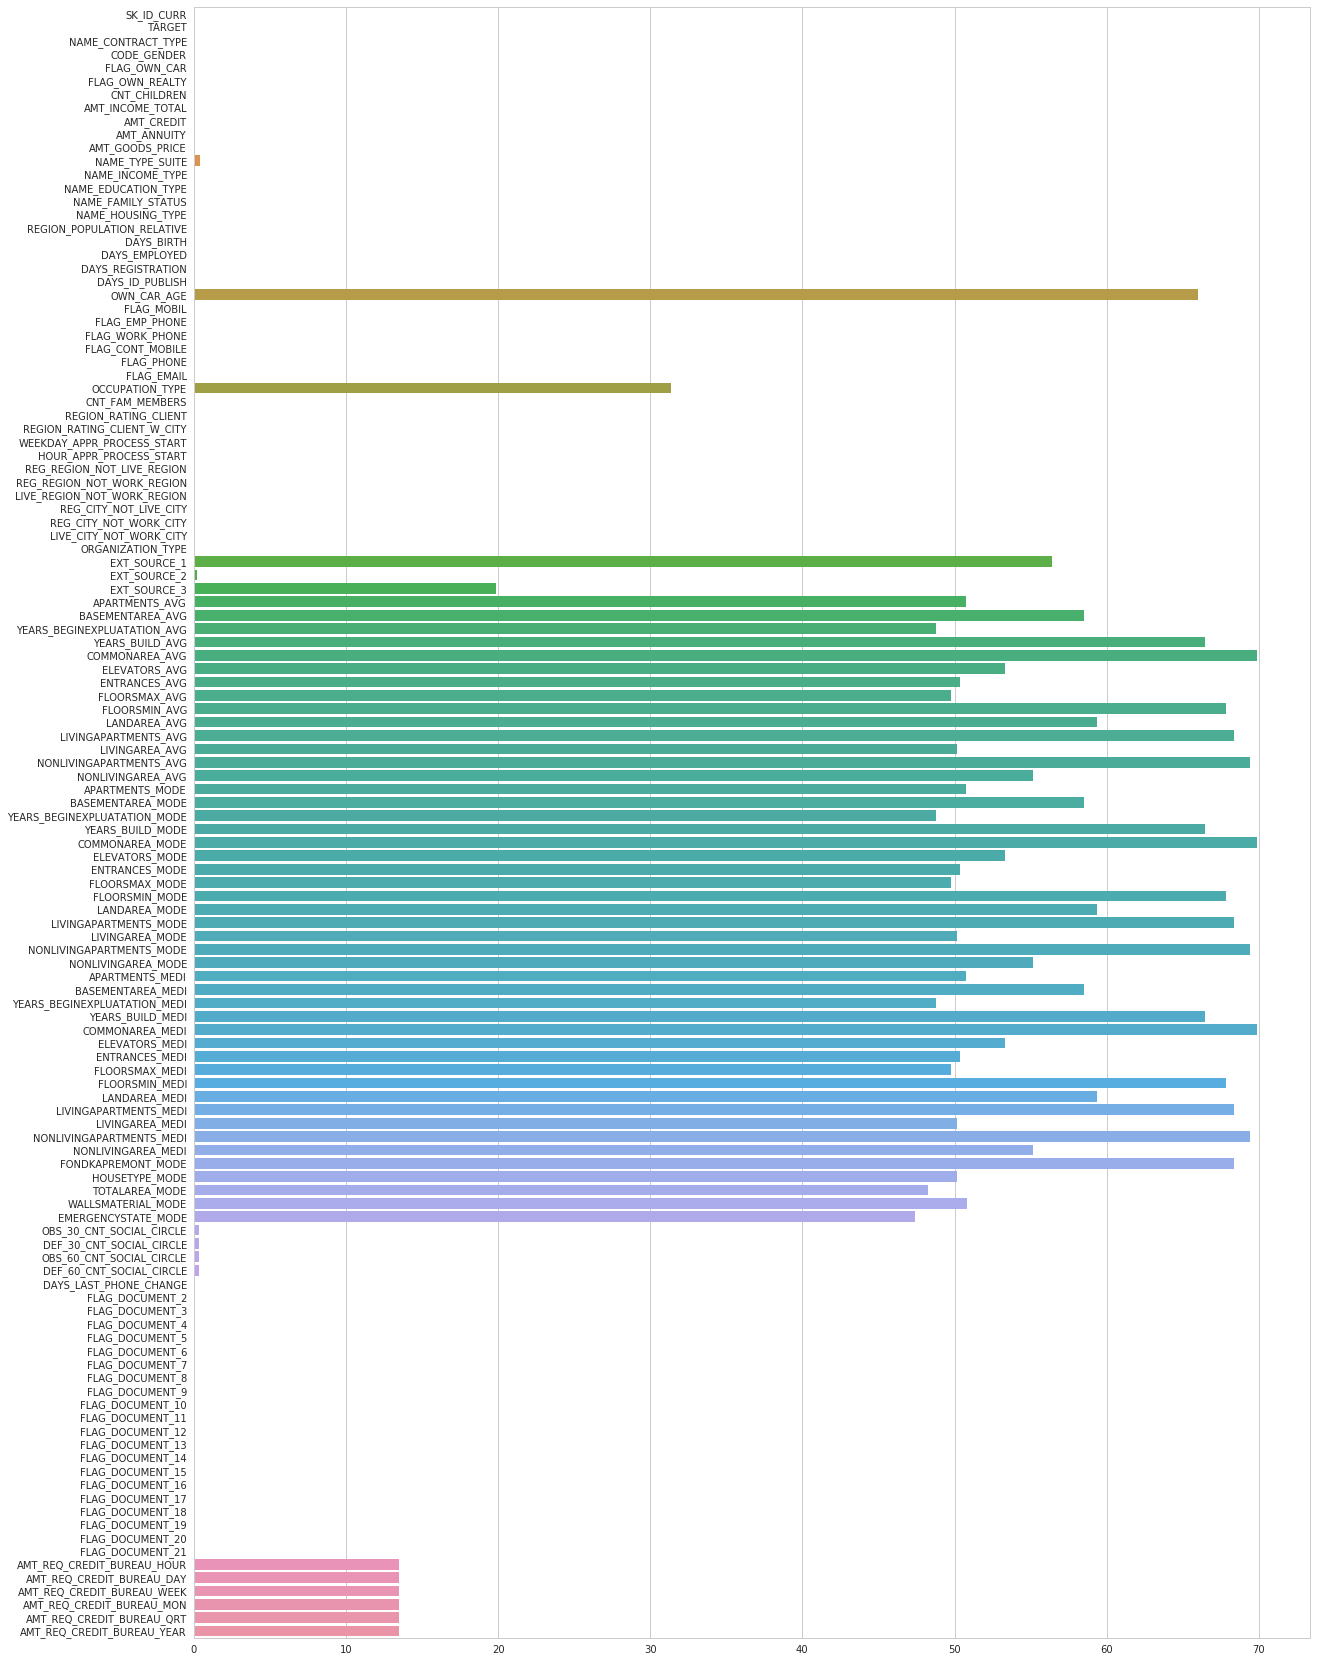

In [6]:
%matplotlib inline
sns.set(style="whitegrid", context="notebook",rc={'figure.figsize':(20,30)},font="Gerogia")
sns.barplot(y=loan.columns,x=100*(loan.isnull().sum()/loan.shape[0]))

Clearly from the above visualisation, a good number of columns have over 20% missing values. Such columns cannot be analysed further and hence let us drop those columns

In [3]:
#removing the columns who has more the 20% missing values
mis_col = loan.columns[100*(loan.isnull().sum()/loan.shape[0]) > 20]
new_loan = loan.drop(mis_col,axis=1)
new_loan.shape

(307511, 72)

From the above visualization, we can also pick the 6 columns(AMT_REQ_CREDIT_BUREAU_HOUR,DAY,WEEK,MON,QRT,YEAR) that have around 14% of missing values and impute them with mode. For the variable that has around 20% of missing values, we can replace the values with zero. The rest can be imputed with zeroes or the mean/median.

### Imputing Data and Error Detection

In [4]:
#imputing the values using the interpolate method(This automatically picks the best imputing method based on the data)
new_loan.interpolate(inplace=True)
new_loan.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

We still have one column with some Nans. Since this column is categorical, lets drop the records

In [5]:
new_loan.dropna(inplace=True,axis=0)

Now that we have dropped the values. Let us look at the datatypes of the features

In [10]:
new_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306219 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     306219 non-null int64
TARGET                         306219 non-null int64
NAME_CONTRACT_TYPE             306219 non-null object
CODE_GENDER                    306219 non-null object
FLAG_OWN_CAR                   306219 non-null object
FLAG_OWN_REALTY                306219 non-null object
CNT_CHILDREN                   306219 non-null int64
AMT_INCOME_TOTAL               306219 non-null float64
AMT_CREDIT                     306219 non-null float64
AMT_ANNUITY                    306219 non-null float64
AMT_GOODS_PRICE                306219 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               306219 non-null object
NAME_EDUCATION_TYPE            306219 non-null object
NAME_FAMILY_STATUS             306219 non-null object
NAME_HOUSING_TYPE              306219 non-null object
REGION_POPULATION_RELATI

### Datatype Analysis

From the above we can conclude that there are

- 11 Categorical Columns
- 41 Integer-value Columns
- 20 Decimal-value Columns

Let us also convert the following rows into integers for easy post processing

In [6]:
new_loan["TARGET"] = new_loan["TARGET"].astype("category")
cols = ["TARGET","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]
for i in cols:
    new_loan[i] = new_loan[i].astype("int64")

We now check for negative values

In [7]:

rule_columns = new_loan.columns
final_columns = []
for val in rule_columns:
    if val.startswith('FLAG') or val.startswith('NAME'):
        pass
    else:
        if new_loan[val].dtype==object:
            pass
        else:
            final_columns.append(val)

negative_columns = []
for column in final_columns:
    if len(new_loan[new_loan[column]<0])>0:
        print(len(new_loan[new_loan[column]<0]))
        negative_columns.append(column)
negative_columns

306219
251039
306139
306203
268669


['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

The four columns above have negative values. One reason for this could be the mis-representation of data. Looking at the lengths of these records, its clear that there must have been a different way of recording the input. 



Assuming that the values have been erroneously entered. Let us call the absolute method to change the sign

In [8]:
for column in negative_columns:
    new_loan[column] = new_loan[column].abs()

In [14]:
new_loan.shape

(306219, 72)

### Feature Selection

The current dataset has too many rows to analyse. Lets remove some rows based on their description to easen up our analysis process.

In [9]:
# the below are the unwanted columns for Analysis
unwanted = ["FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","CNT_FAM_MEMBERS","EXT_SOURCE_2","EXT_SOURCE_3","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]
len(unwanted)

45

#### How were these features selected?

Firstly, all the feature columns that were flags except for the `FLAG_LAST_APPL_PER_CONTRACT` were dropped. Flag feature columns only represented the presence of data but not the implications of the data itself. The presence of a particular document or a mobile number cannot be extrapolated towards defaulting. Since we cannot concretely derive an analysis from these features, we choose not to include them in our analysis.

We also dropped all the address-based features which checked for equivalence between work and permanent address. The proximity of a customer to a loan providing company is definitely a strong variable to consider but the proximity of the customer to his/her permanent/work address cannot be used to draw concrete insights. Hence these columns were also dropped.

The columns that ended with Social Circles were also dropped since they did not pose any significant contribution to the analysis. Not only were the measurement of social surroundings unperceivable but also there wasnt enough information on its implications.

In [10]:
# so lets remove unwanted columns from analysis
new_loan = new_loan.drop(unwanted,axis=1)

In [17]:
new_loan.shape

(306219, 27)

In [18]:
new_loan

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0           100002       1         Cash loans           M             0   
1           100003       0         Cash loans           F             0   
2           100004       0    Revolving loans           M             0   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
5           100008       0         Cash loans           M             0   
6           100009       0         Cash loans           F             1   
7           100010       0         Cash loans           M             0   
8           100011       0         Cash loans           F             0   
9           100012       0    Revolving loans           M             0   
10          100014       0         Cash loans           F             1   
11          100015       0         Cash loans           F             0   
12          100016       0         Cash loans           F             0   
13          100017       0         Cash loans           M             1   
14          100018       0         Cash loans           F             0   
15          100019       0         Cash loans           M             0   
16          100020       0         Cash loans           M             0   
17          100021       0    Revolving loans           F             1   
18          100022       0    Revolving loans           F             0   
19          100023       0         Cash loans           F             1   
20          100024       0    Revolving loans           M             0   
21          100025       0         Cash loans           F             1   
22          100026       0         Cash loans           F             1   
23          100027       0         Cash loans           F             0   
24          100029       0         Cash loans           M             2   
25          100030       0         Cash loans           F             0   
26          100031       1         Cash loans           F             0   
27          100032       0         Cash loans           M             1   
28          100033       0         Cash loans           M             0   
29          100034       0    Revolving loans           M             0   
30          100035       0         Cash loans           F             0   
31          100036       0         Cash loans           F             0   
32          100037       0         Cash loans           F             0   
33          100039       0         Cash loans           M             1   
34          100040       0         Cash loans           F             0   
35          100041       0         Cash loans           F             0   
36          100043       0         Cash loans           F             2   
37          100044       0         Cash loans           M             0   
38          100045       0         Cash loans           F             0   
39          100046       0    Revolving loans           M             0   
40          100047       1         Cash loans           M             0   
41          100048       0         Cash loans           F             0   
42          100049       1         Cash loans           F             0   
43          100050       0         Cash loans           F             0   
44          100051       0         Cash loans           M             0   
45          100052       0    Revolving loans           F             1   
46          100053       0         Cash loans           F             0   
47          100054       0         Cash loans           F             0   
48          100055       0         Cash loans           F             0   
49          100056       0         Cash loans           M             0   
50          100058       0    Revolving loans           F             0   
51          100059       0         Cash loans           M             1   
52          100060       0       

# Data Analysis

Let us first convert the Target columnn into a category to find imbalance percentage

In [19]:

new_loan["TARGET"].value_counts()

0    281464
1     24755
Name: TARGET, dtype: int64

In [20]:
print("The Imbalance percentage is: {}%".format(100*new_loan["TARGET"].value_counts()[1]/new_loan["TARGET"].value_counts()[0]))

The Imbalance percentage is: 8%


Let us divide the dataset into two categories. One containing Target one columns and the other containing Target zero

### Univariate Analysis on Categorical Variables
There are eight categorical variables in all. Let us look at each one closely and see how they segment out across both the target categories

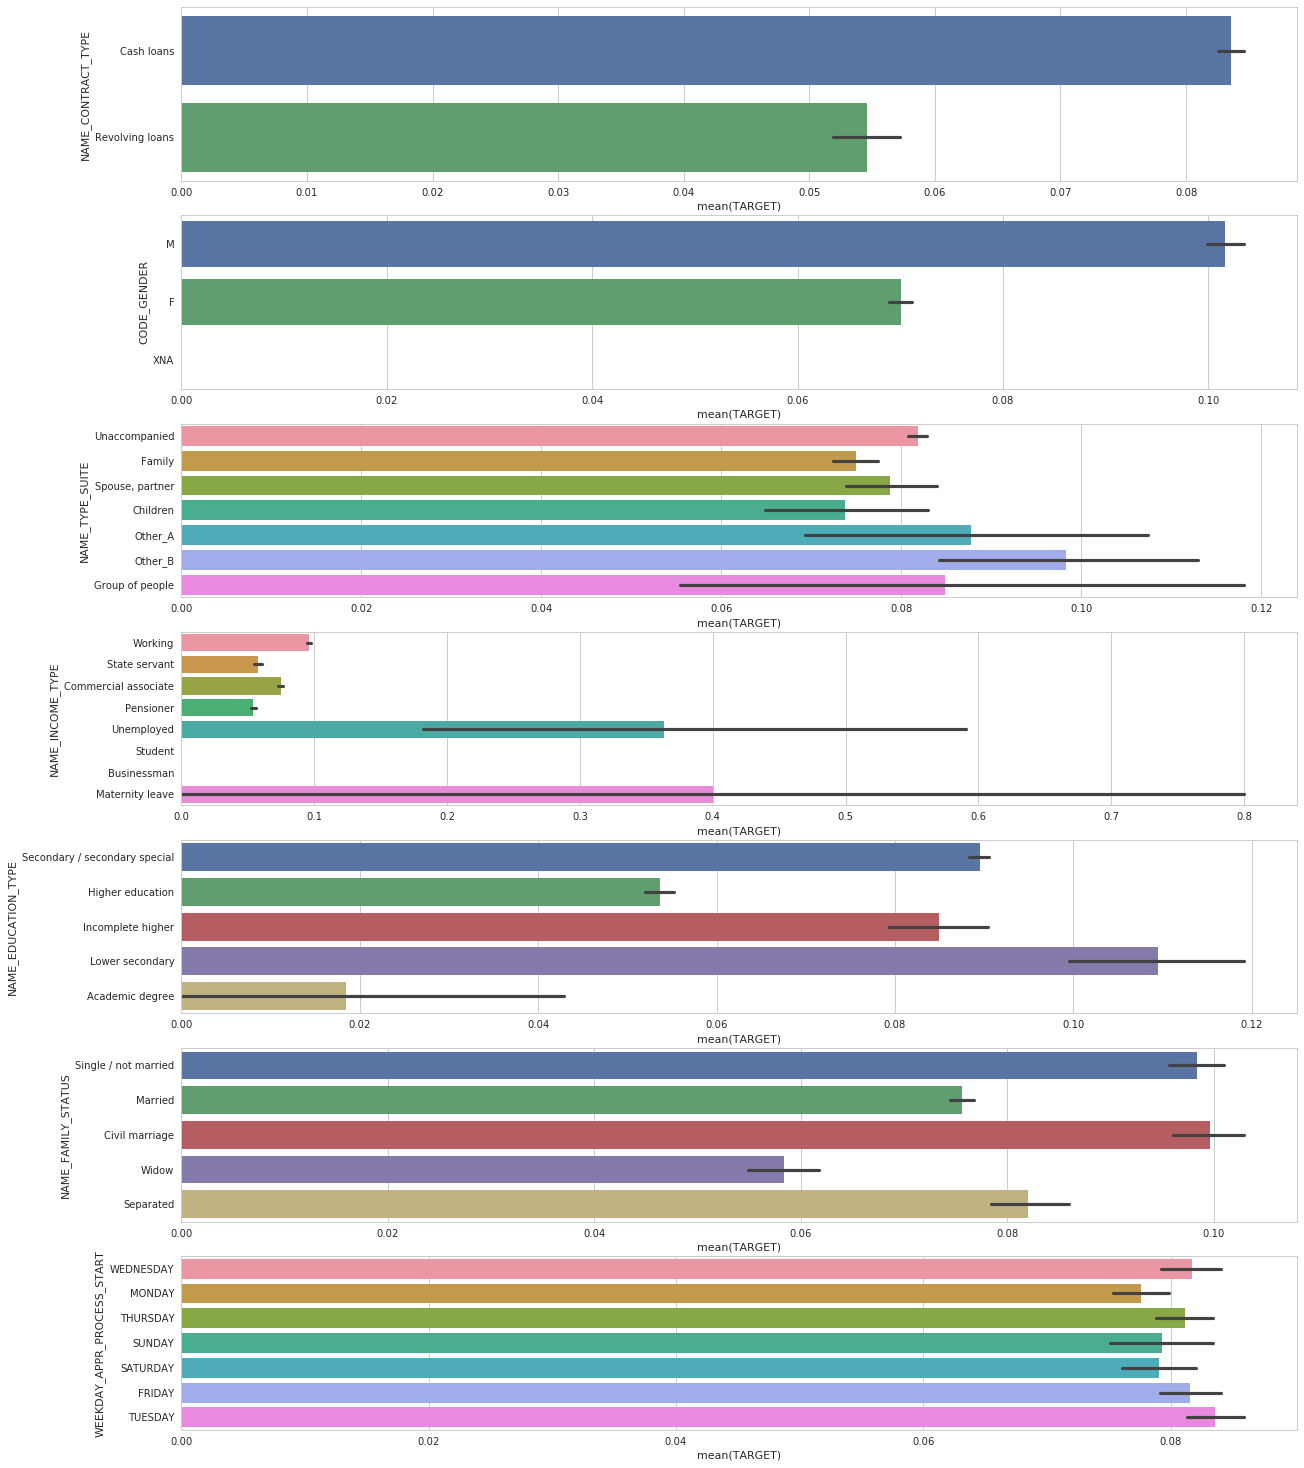

In [22]:
plt.figure(1)
count = 0
sns.set(style="whitegrid", context="notebook",rc={'figure.figsize':(20,20)},font="Gerogia")
for column in target_one.columns:
    if target_one[column].dtype==object and column!="ORGANIZATION_TYPE":
        count+=1
        plt.subplot(810+count)
        sns.barplot(y=column,x="TARGET",data=new_loan)


Let us look at the plots above and understand how the target value relates to each segment in the 7 categorical variables. We can also figure out the outliers from the extended black lines and nullify their effect.

- Starting with the Name Contact Type, the customers paying loan in cash have more defaulters than revolving loan
- Men tend to default lot more than women. Though this could also be due to irregular representation since women are given less number of loans when compared to men
- A pensioner tends to pay his defaults more judiciaciously when compared to a person on Maternity leave or a person unemployed. This could be due the absence of the only source of income which would have contributed towards the default
- As expected, a person with a higher degrees general default less when compared to people with a lower qualification. Hence, this could be a strong indicator of a defaultor. An interesting fact to note here is the presence of a huge marginal outlier in the Academic degree. This could mean that though the majority of the people with an academic degree hardly default, there could be a rare case scenario where a customer could still default.This outlier is still lower than next most probable defaulter.
- Widows tend to default less compared to any other family type. A civil married couple tend to default more than any other form. 
-  Though the process start date rarely has any concrete correlation with defaulting, a pattern is observed where people who applied for a loan on Monday tend to default less. This is generally an indication of those customers who are good planners and hence correlate to paying their dues. This isnt a concrete feature for defaulter identification but is surely an absurd pattern

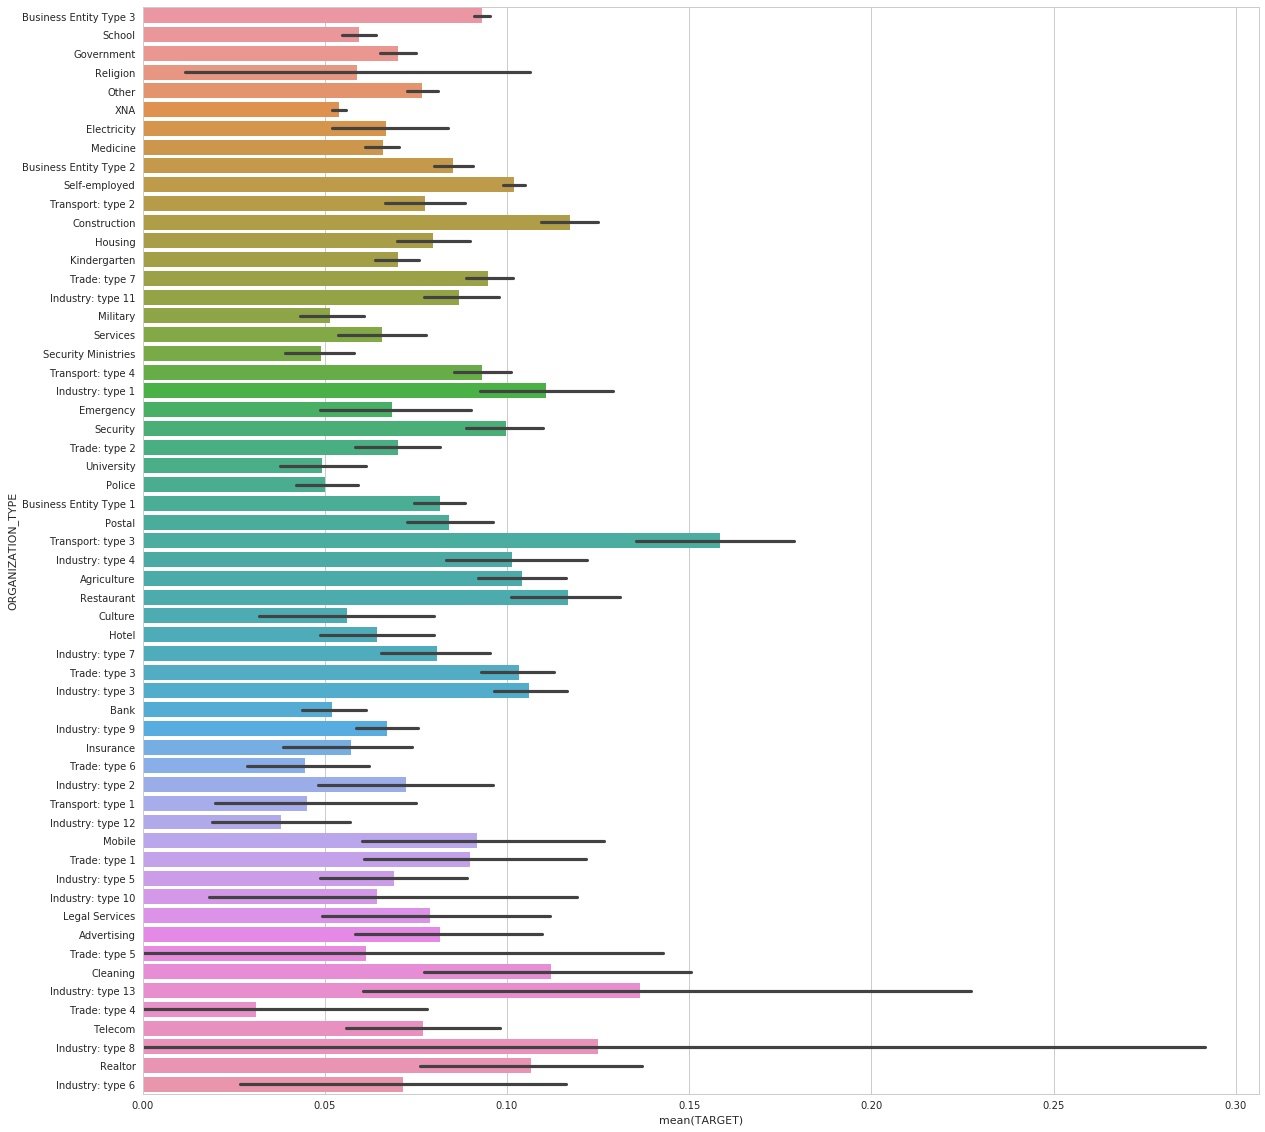

In [23]:
sns.barplot(y="ORGANIZATION_TYPE",x="TARGET",data=new_loan)

The above plot shows a the distribution of defaulters across various organisation types. Indutry Type: 8 and 13 have extended outliers which are extremely high. Since desciption of the industry types are missing, this feature is not a good representation of defaulters. We will discard this feature from our analysis

### Univariate Analysis on Numerical Features(Outlier Analysis) 
 Though we arent asked to remove the outliers. We were able to identify the outliers from the above plots. Let us also look into the outliers present in the Amount based features
 

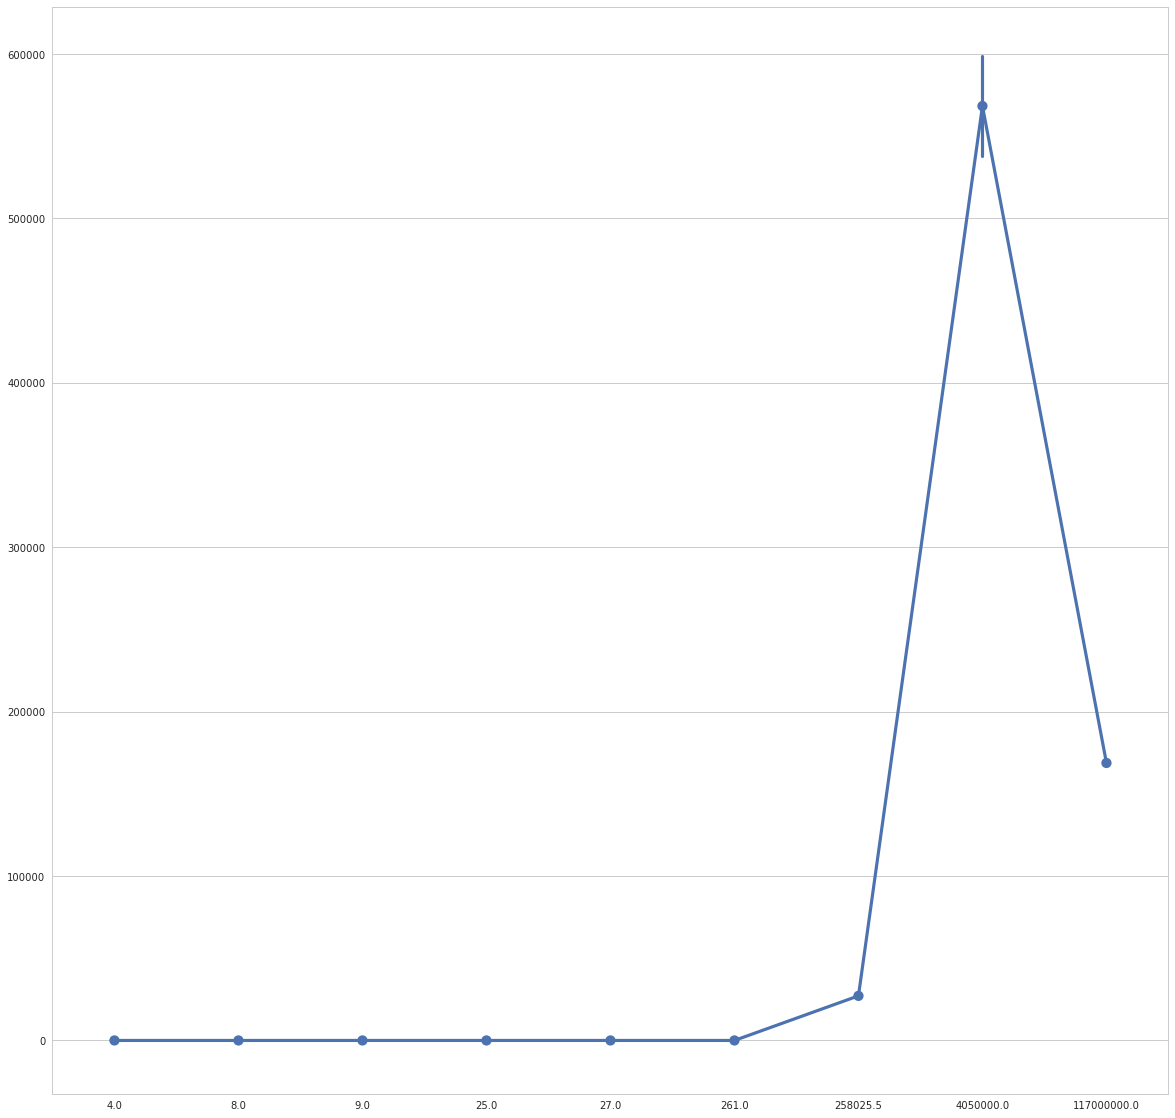

In [24]:
#  annual income
max_amt = []
mean_amt = []
names = []
for column in new_loan.columns:
    if column.startswith('AMT'):
        names.append(column) #storing column names
        mean_amt.append(new_loan[column].describe()[1]) #storing the maximum
        max_amt.append(new_loan[column].describe()[-1]) #storing the minimum
sns.pointplot(x=max_amt,y=mean_amt,kind='line')

In [31]:
names[:3]

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

From the plot above, we can see that the following columns have high number of outliers : 
- 'AMT_INCOME_TOTAL'
- 'AMT_CREDIT'
- 'AMT_ANNUITY'

### Derived metrix

Now to understand clearly we derive new columns in our dataframe

In [11]:
# ratio of loan taken with the Annual income

new_loan["loan_ratio"] = new_loan["AMT_CREDIT"]/new_loan["AMT_INCOME_TOTAL"]

In [12]:
# number of enqiries done on the customer within a year

new_loan["bureau_enqiry_withinyear"] = new_loan["AMT_REQ_CREDIT_BUREAU_HOUR"] + new_loan["AMT_REQ_CREDIT_BUREAU_DAY"] + new_loan["AMT_REQ_CREDIT_BUREAU_WEEK"] + new_loan["AMT_REQ_CREDIT_BUREAU_MON"] + new_loan["AMT_REQ_CREDIT_BUREAU_QRT"] + new_loan["AMT_REQ_CREDIT_BUREAU_YEAR"]

### Segmented Univariate

In [13]:
loan_corr = new_loan.corr()
loan_corr

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002148     -0.001272   
TARGET                       -0.002148  1.000000      0.019277   
CNT_CHILDREN                 -0.001272  0.019277      1.000000   
AMT_INCOME_TOTAL             -0.001750 -0.003921      0.012893   
AMT_CREDIT                   -0.000184 -0.030309      0.002090   
AMT_ANNUITY                  -0.000261 -0.012816      0.021472   
AMT_GOODS_PRICE              -0.000195 -0.039581     -0.002028   
DAYS_BIRTH                    0.001597 -0.078567     -0.331173   
DAYS_EMPLOYED                 0.001400 -0.047182     -0.241623   
DAYS_REGISTRATION             0.001076 -0.042129     -0.183458   
DAYS_ID_PUBLISH               0.000432 -0.051528      0.028030   
HOUR_APPR_PROCESS_START       0.000538 -0.024137     -0.007314   
DAYS_LAST_PHONE_CHANGE        0.000694 -0.055631      0.005403   
AMT_REQ_CREDIT_BUREAU_HOUR   -0.002825  0.000071     -0.000387   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002759  0.002550     -0.000668   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002684  0.000126     -0.002098   
AMT_REQ_CREDIT_BUREAU_MON    -0.000198 -0.009618     -0.010380   
AMT_REQ_CREDIT_BUREAU_QRT    -0.000050 -0.001807     -0.006262   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004284  0.017565     -0.037290   
loan_ratio                   -0.001602 -0.007640     -0.015984   
bureau_enqiry_withinyear      0.003414  0.010048     -0.037075   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001750   -0.000184    -0.000261   
TARGET                             -0.003921   -0.030309    -0.012816   
CNT_CHILDREN                        0.012893    0.002090     0.021472   
AMT_INCOME_TOTAL                    1.000000    0.156154     0.191057   
AMT_CREDIT                          0.156154    1.000000     0.769913   
AMT_ANNUITY                         0.191057    0.769913     1.000000   
AMT_GOODS_PRICE                     0.159050    0.986975     0.775065   
DAYS_BIRTH                         -0.027170    0.056325    -0.009509   
DAYS_EMPLOYED                      -0.063699   -0.063503    -0.102577   
DAYS_REGISTRATION                  -0.027565   -0.009064    -0.038476   
DAYS_ID_PUBLISH                    -0.008503    0.006504    -0.011456   
HOUR_APPR_PROCESS_START             0.036362    0.052481     0.052245   
DAYS_LAST_PHONE_CHANGE              0.018720    0.075041     0.064045   
AMT_REQ_CREDIT_BUREAU_HOUR          0.000846   -0.002626     0.003958   
AMT_REQ_CREDIT_BUREAU_DAY           0.002799    0.003256     0.001576   
AMT_REQ_CREDIT_BUREAU_WEEK          0.002223   -0.001864     0.011808   
AMT_REQ_CREDIT_BUREAU_MON           0.022893    0.048694     0.034431   
AMT_REQ_CREDIT_BUREAU_QRT           0.005559    0.014732     0.009014   
AMT_REQ_CREDIT_BUREAU_YEAR          0.010771   -0.044255    -0.011036   
loan_ratio                         -0.108208    0.651198     0.392828   
bureau_enqiry_withinyear            0.020264   -0.011786     0.009129   

                            AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                        -0.000195    0.001597       0.001400   
TARGET                            -0.039581   -0.078567      -0.047182   
CNT_CHILDREN                      -0.002028   -0.331173      -0.241623   
AMT_INCOME_TOTAL                   0.159050   -0.027170      -0.063699   
AMT_CREDIT                         0.986975    0.056325      -0.063503   
AMT_ANNUITY                        0.775065   -0.009509      -0.102577   
AMT_GOODS_PRICE                    1.000000    0.054611      -0.061289   
DAYS_BIRTH                         0.054611    1.000000       0.623811   
DAYS_EMPLOYED                     -0.061289    0.623811       1.000000   
DAYS_REGISTRATION                 -0.011000    0.331839       0.214360   
DAYS_ID_PUBLISH                    0.009295    0.272572       0.274985   
HOUR_APPR_PROCESS_START            0.062035   -0.090826      -0.091437   
DAYS_L

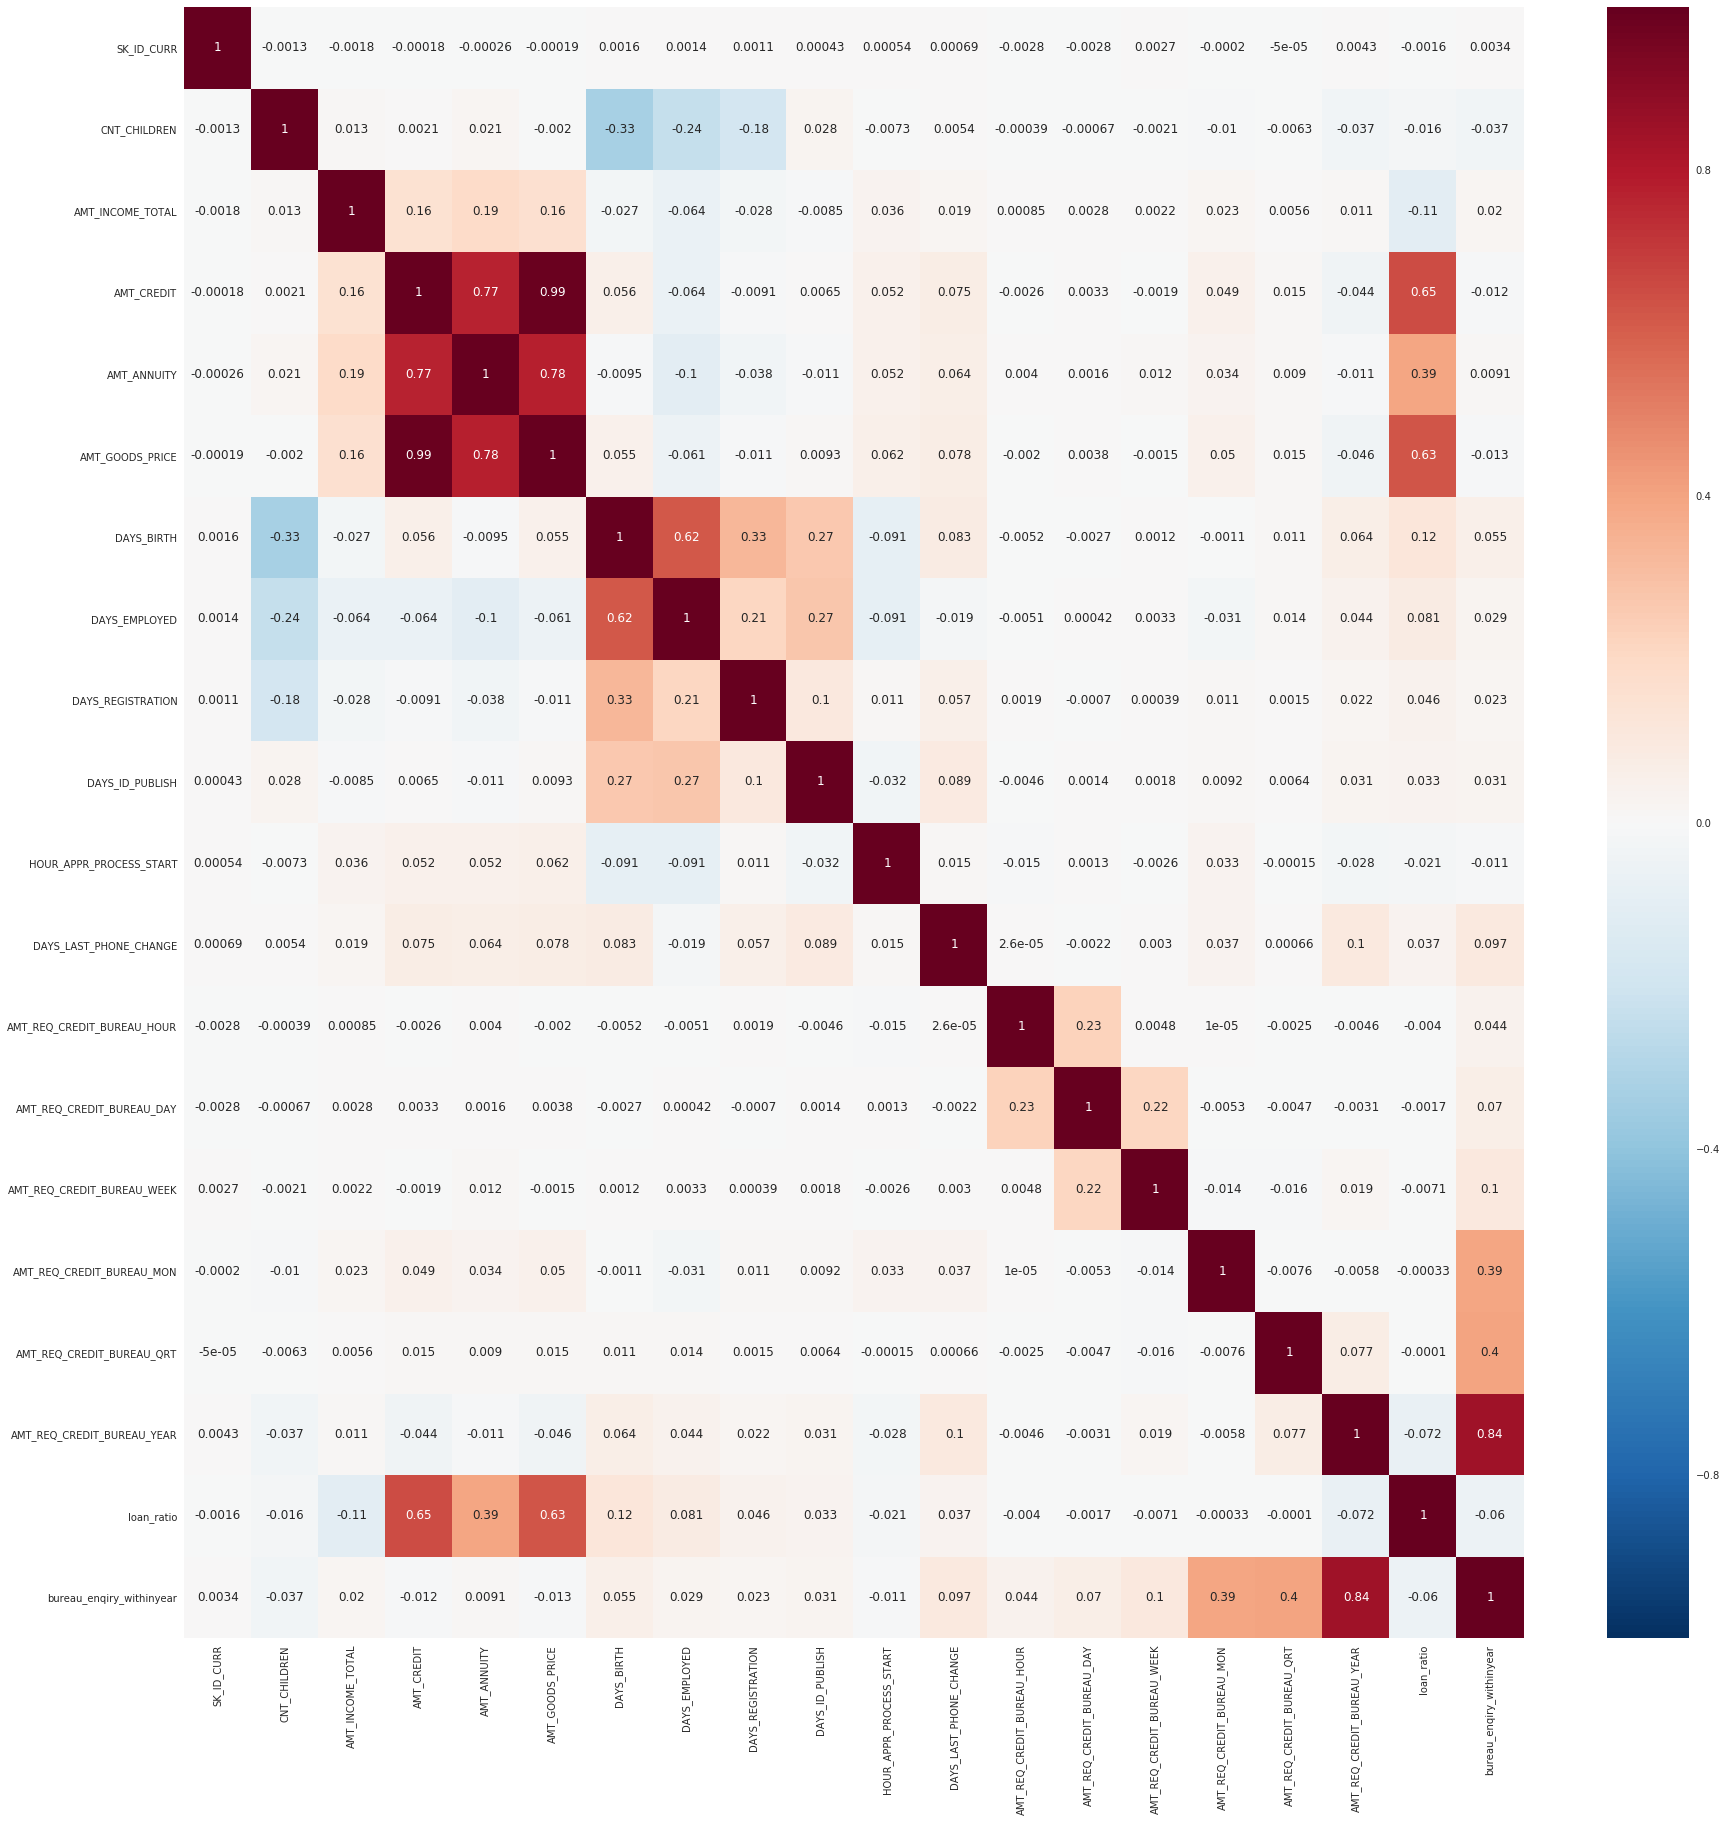

In [29]:
f,ax = plt.subplots(figsize=(30,30))
sns.heatmap(loan_corr,
           xticklabels = loan_corr.columns.values,
           yticklabels = loan_corr.columns.values,
           annot = True)
plt.show()

From the above, we can see that there is a strong correlation betwen Annuity of previous application with Final amount on previous application and the with the price of the goods client asked for in the previous application.
So we can infer that the annuity of previous application is directly propotional to the final amount and the cost of the goods. This is a logical conclusion since the previous application's annuity depends on the final amount sanctioned and the cost of the goods. 

There is also a fairly strong correlation between Days of Birth and Days of employment. This again is an obvious correlation. An older person will tend to have a longer employment run.

The loan ratio is directly correlated with the Amount Credited previously and the Goods price of the previous application. This is an interesting insight. The loan ratio tends to increase if the previous application had a higher amount of goods price and amount sanctioned. Hence, someone who had taken a large loan previous has higher chances of getting a new loan.

## Bivariate Analysis on Categorical Variables

Based on the analysis above, lets see how some features correlate when the target is one and when the target is zero. Lets start off with the loan ratio variable and see how it correlates to Amount credit when target is one.

In [14]:
target_one = new_loan[new_loan['TARGET']==1]
target_two = new_loan[new_loan['TARGET']==0]

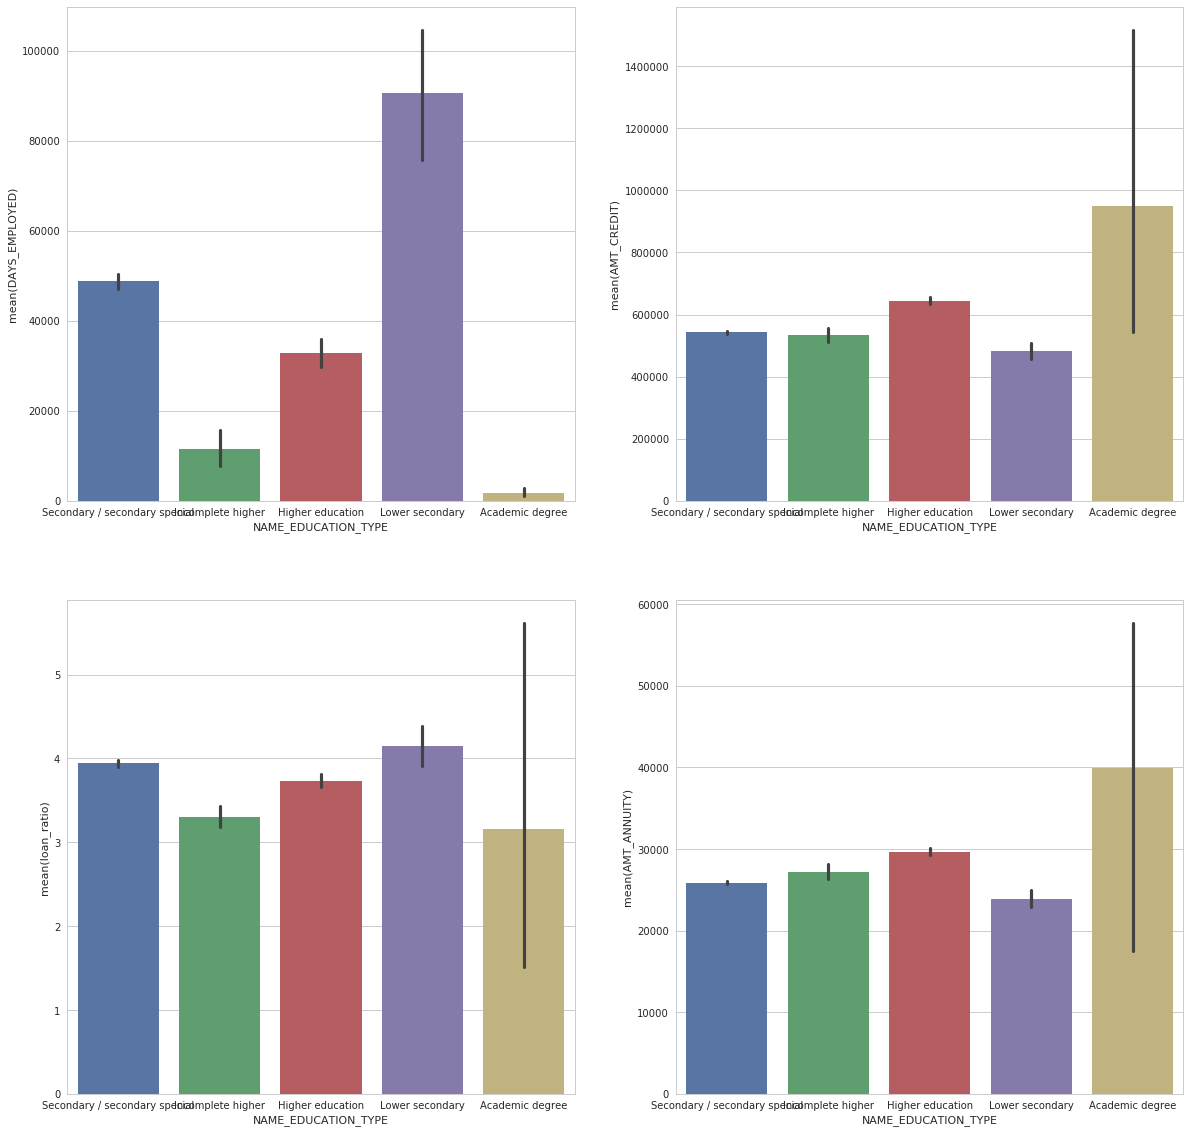

In [28]:
%matplotlib inline
sns.set(style="whitegrid", context="notebook",rc={'figure.figsize':(20,20)},font="Gerogia")
plt.figure(1)

plt.subplot(2,2,1)

sns.barplot(y="DAYS_EMPLOYED",x="NAME_EDUCATION_TYPE",data=target_one)

plt.subplot(2,2,2)

sns.barplot(y="AMT_CREDIT",x="NAME_EDUCATION_TYPE",data=target_one)

plt.subplot(2,2,3)

sns.barplot(y="loan_ratio",x="NAME_EDUCATION_TYPE",data=target_one)

plt.subplot(2,2,4)

sns.barplot(y="AMT_ANNUITY",x="NAME_EDUCATION_TYPE",data=target_one)

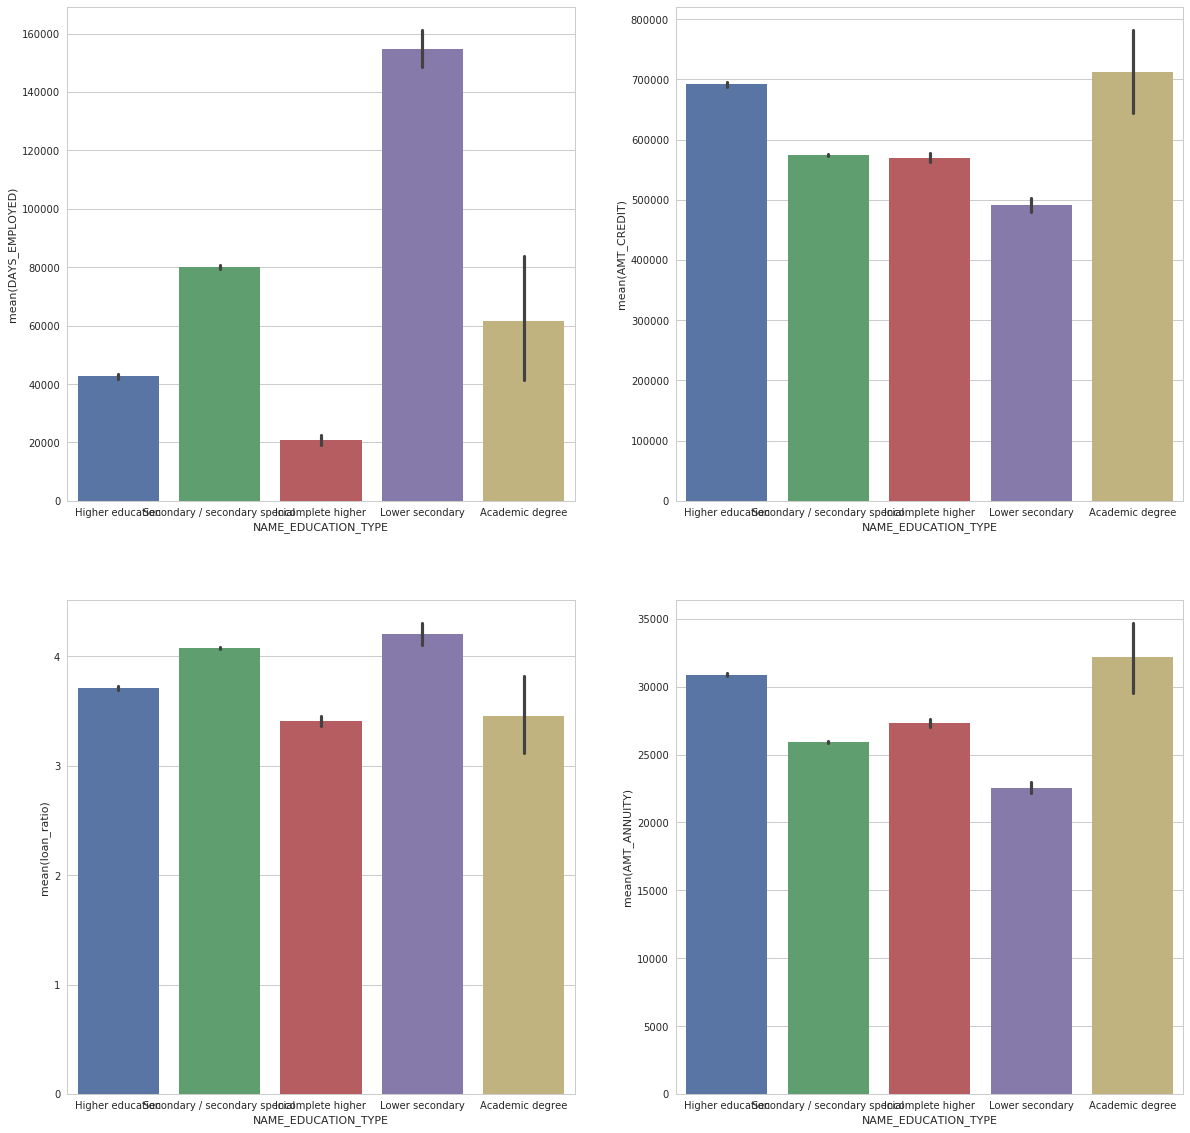

In [29]:
plt.figure(1)

plt.subplot(2,2,1)

sns.barplot(y="DAYS_EMPLOYED",x="NAME_EDUCATION_TYPE",data=target_two)

plt.subplot(2,2,2)

sns.barplot(y="AMT_CREDIT",x="NAME_EDUCATION_TYPE",data=target_two)

plt.subplot(2,2,3)

sns.barplot(y="loan_ratio",x="NAME_EDUCATION_TYPE",data=target_two)

plt.subplot(2,2,4)

sns.barplot(y="AMT_ANNUITY",x="NAME_EDUCATION_TYPE",data=target_two)

Let us combine the previous application data set and find some interesting insights

In [32]:
#merging the two dataframes
loan_combined = pd.merge(loan, prev, how="right",on = ["SK_ID_CURR"])
loan_combined.drop_duplicates(inplace=True)

In [34]:
loan_combined.drop(unwanted,axis=1,inplace=True)

ValueError: labels ['FLAG_OWN_CAR' 'FLAG_OWN_REALTY' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'FLAG_MOBIL' 'FLAG_EMP_PHONE'
 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE' 'FLAG_EMAIL'
 'CNT_FAM_MEMBERS' 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'FLAG_DOCUMENT_2'
 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_4' 'FLAG_DOCUMENT_5' 'FLAG_DOCUMENT_6'
 'FLAG_DOCUMENT_7' 'FLAG_DOCUMENT_8' 'FLAG_DOCUMENT_9' 'FLAG_DOCUMENT_10'
 'FLAG_DOCUMENT_11' 'FLAG_DOCUMENT_12' 'FLAG_DOCUMENT_13'
 'FLAG_DOCUMENT_14' 'FLAG_DOCUMENT_15' 'FLAG_DOCUMENT_16'
 'FLAG_DOCUMENT_17' 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_19'
 'FLAG_DOCUMENT_20' 'FLAG_DOCUMENT_21' 'OBS_30_CNT_SOCIAL_CIRCLE'
 'DEF_30_CNT_SOCIAL_CIRCLE' 'OBS_60_CNT_SOCIAL_CIRCLE'
 'DEF_60_CNT_SOCIAL_CIRCLE' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY'] not contained in axis

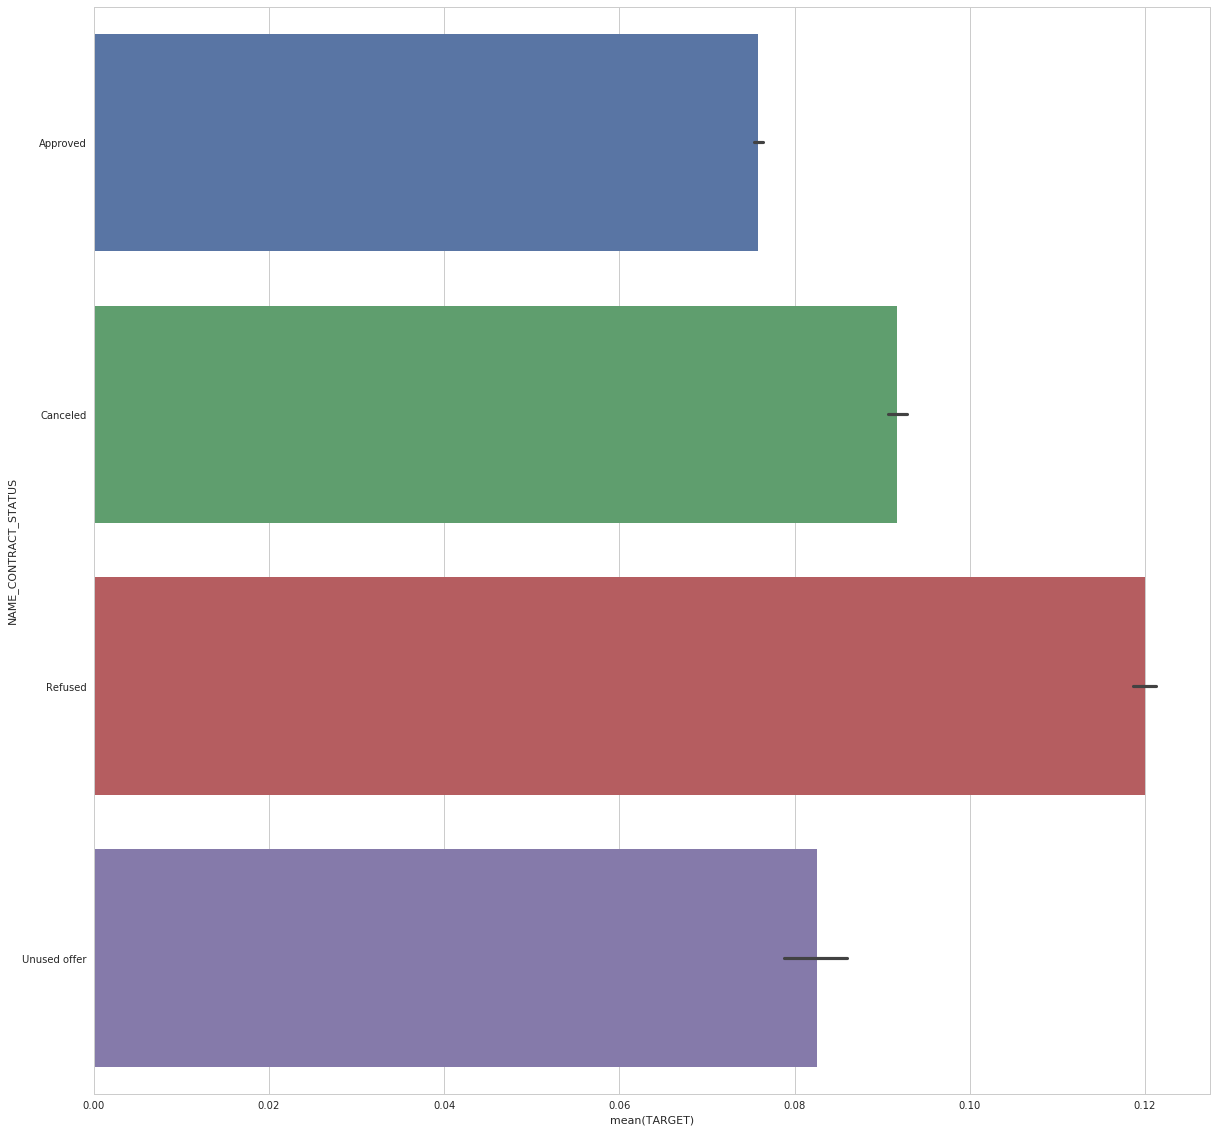

In [41]:
sns.barplot(x="TARGET",y="NAME_CONTRACT_STATUS",data=loan_combined)

In [35]:
loan_combined_one = loan_combined[loan_combined['TARGET']==1.0]

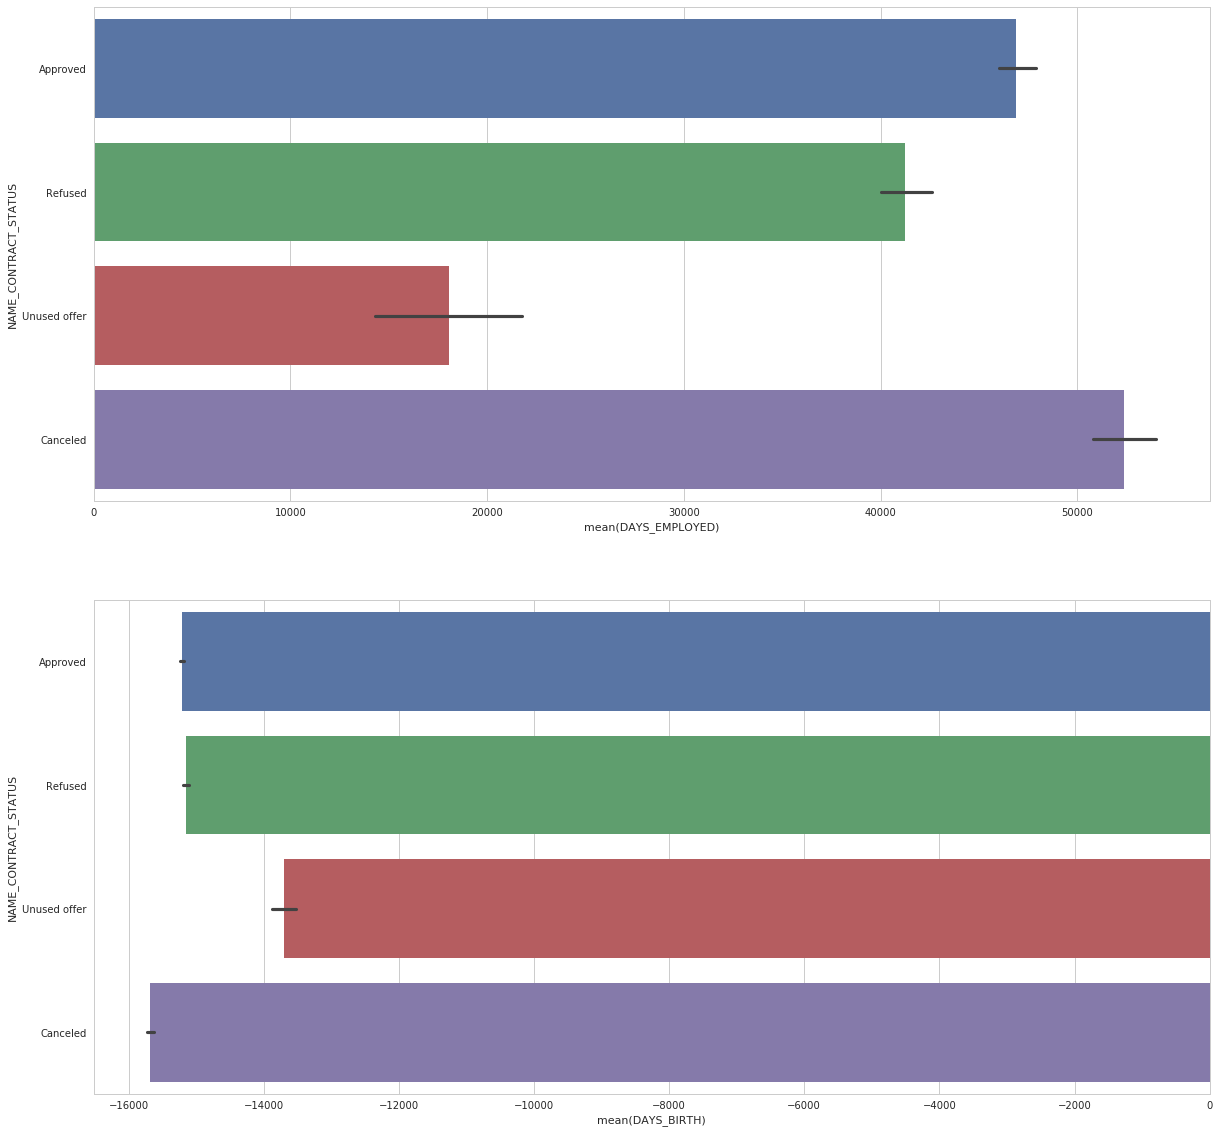

In [40]:
plt.figure(1)
plt.subplot(2,1,1)
sns.barplot(x="DAYS_EMPLOYED",y="NAME_CONTRACT_STATUS",data=loan_combined_one)
plt.subplot(2,1,2)
sns.barplot(x="DAYS_BIRTH",y="NAME_CONTRACT_STATUS",data=loan_combined_one)